<a href="https://colab.research.google.com/github/UN-GCPDS/curso_IA_CHEC/blob/main/Modulo3/cuadernos/Aprendizaje_profundo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Logo UNAL CHEC](https://github.com/UN-GCPDS/curso_IA_CHEC/blob/main/logo_unal_chec.jpg?raw=1)


# **MÓDULO 3: APRENDIZAJE PROFUNDO**

## Descripción:
Modelos de aprendizaje profundo basado en redes neuronales para tareas de regresión, visión por computador y procesado de series de tiempo.

### **Profesor - Sesión 5:** Diego Armando Pérez Rosero
### **Monitores - Sesión 5:** Danna Valentina Salazar Dubois, Juan Camilo Lugo Rojas y Lucas Miguel Iturriago Salas

# Introducción a las redes neuronales profundas

- Se presentan los principios básicos de funcionamiento de las redes neuronales a partir del perceptrón simple hasta perceptrones multicapa.

- Se implementan arquitecturas secuenciales utilizando la librería [TensorFlow](https://www.tensorflow.org/overview?hl=es-419) y la [API Keras](https://keras.io/).

## Perceptrón

- El perceptrón presenta un modelo lineal de la forma:

$$\hat{y} = {\rm{sign}}(\mathbf{w}^\top \mathbf{x}) $$

- Para optimizarlo, se plantea un algoritmo de gradiente descendiente estocástico:

$$\mathbf{w}^* = \arg\max_{\mathbf{w}} - \sum_{\mathbf{x}_n\in \mathbf{X}}\langle \mathbf{w}^\top \mathbf{x}_n ,y_n\rangle$$

$$\mathbf{w}_i =\mathbf{w}_{i-1}-\eta_i \mathbf{x}_ny_n$$

donde $\mathbf{x}_n,\mathbf{w}\in\mathbb{R}^P$ corresponde a la $n$-ésima muestra y al vector de pesos; $y_n\in\{-1,+1\}$ son las etiquetas objetivo, y $\eta_i\in \mathbb{R}^+$ es el hiperparámetro tasa de aprendizaje (learning rate).

**Scikit-Learn** proporciona una clase *Perceptron* que implementa una única red.

In [ ]:
#@title Importación de librerías
import tensorflow as tf
from tensorflow import keras
import numpy as np

# Cargar el dataset y preparar los datos
mnist = keras.datasets.mnist # Puedes cambiar a fashion_mnist si lo necesitas
(X_train, ytrain), (X_test, ytest) = mnist.load_data()

# Redimensionar y normalizar los datos
Xtrain = X_train.reshape(X_train.shape[0], -1) / 255.
Xtest = X_test.reshape(X_test.shape[0], -1) / 255.
#librerias a importar
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import roc_curve, auc
from itertools import cycle
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import joblib
from ipywidgets import Checkbox, Dropdown, FloatRangeSlider, IntRangeSlider, Button, VBox, HBox, Output
from IPython.display import display
import os
import joblib
from ipywidgets import interact, Dropdown
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import FloatSlider, IntSlider, Button, VBox, Output, interactive_output
from IPython.display import display, clear_output
from ipywidgets import interact, FloatSlider, IntSlider
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from ipywidgets import IntSlider, Dropdown, interactive_output, VBox
from IPython.display import display
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from ipywidgets import IntSlider, Dropdown, interactive_output, VBox
from IPython.display import display
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings("ignore")

#crear carpeta resultados
try:
  os.mkdir('results')
except:
  print("Carpeta results ya existe")

#%%  guardar figuras
def save_fig(path_img,fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(path_img, fig_id + "." + fig_extension)
    print("Guardando...", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    files.download(path)

import seaborn as sns

#curvas roc multiclase
def roc_auc_mc(roc_auc,fpr,tpr,n_classes,title,path_img):
    lw = 2
    # Falsos positivos
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    # roc
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i]) #interpolar para suavizar
    # promediado sobre numero de clases
    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # graficar
    plt.figure(figsize=(6,6))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    #colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    colors = sns.color_palette(None, n_classes)
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='AUC_class_{0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="best")#,bbox_to_anchor=(1.4, 0.75))
    plt.show()


#matriz confusión = #[[TN FP][FN TP]]
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') #clasificador aleatorio
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)


# ROC curve and ROC
def roc_multiclass(ytrue,yscore):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = ytrue.shape[1]
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(ytrue[:, i], yscore[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Calcular micro-average ROC curve y ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(ytrue.ravel(), yscore.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    return roc_auc, fpr, tpr, n_classes

def plot_confusion_matrix(y_true, y_pred, classes,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    gráfica la matriz de confusión con y sin normalización
    """
    if not title:
        title = 'Matriz de confusión'

    # calcular matriz de confusión
    cm = 100*confusion_matrix(y_true, y_pred,normalize="true")
    # se identifican las etiquetas en los datos
    classes = classes[unique_labels(y_true, y_pred)]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # mostrar ticks
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Etiqueta original',
           xlabel='Predicción')

    # Rotar ticks
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # textos.
    fmt = '.1f'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from ipywidgets import FloatSlider, interactive_output, VBox
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from ipywidgets import Checkbox, interactive_output, VBox
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from ipywidgets import Checkbox, interactive_output, VBox
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from ipywidgets import FloatLogSlider, interactive_output, VBox
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from ipywidgets import interact, FloatSlider, IntSlider
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from ipywidgets import interact, FloatLogSlider, IntSlider
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from ipywidgets import interact, FloatLogSlider
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
from scipy.stats import multivariate_normal as mn
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.spatial.distance import mahalanobis
import numpy as np

from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from ipywidgets import IntSlider, interact
import warnings
warnings.filterwarnings("ignore")



#función para graficar frontera de decisión
def my_plot_biclassifier(model,X,y,levels=15,h = 0.01,score_type="decision_function"): #h:paso en el mesh
    plt.scatter(X[(y==-1).ravel(),0],X[(y==-1).ravel(),1],c='r',marker='o')
    plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],c='b',marker='x')
    plt.xlabel('atributo 1')
    plt.ylabel('atributo 2')

    #rangos de análisis
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))#definir rejilla sobre espacio 2D

    # evaluar decision function o predict proba del modelo
    if score_type == "predict_proba":
      if hasattr(model, "predict_proba"):
          Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]#se define clase en columna 1 como target
      else:
        Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
      if hasattr(model, "decision_function"):
          Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])#se define clase en columna 1 como target
      else:
        Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]


    # graficar resultado en color
    Z = Z.reshape(xx.shape)
    pb = plt.gca().contourf(xx, yy, Z, levels=levels,cmap=plt.cm.RdBu, alpha=0.3)
    cbar_ax = plt.gcf().add_axes([1.01, 0, 0.025, 0.95])
    plt.gcf().colorbar(pb,extend='both', cax=cbar_ax)

    return



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


interactive(children=(IntSlider(value=2, description='Feature X', max=3), IntSlider(value=3, description='Feat…

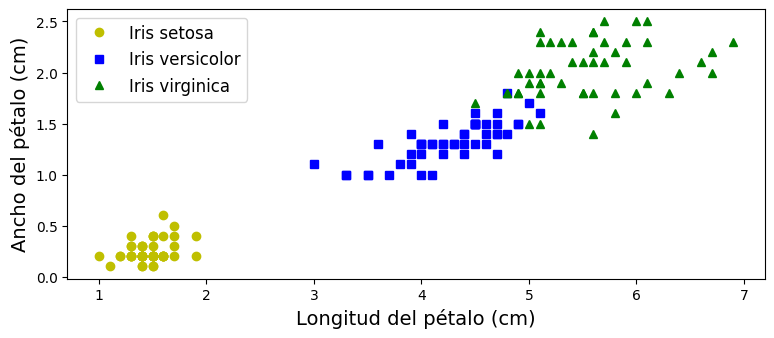

In [ ]:
#@title Generación de datos
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
# Carga de datos
data = load_iris()
X = data.data
y = data.target

# Clase para visualizar y obtener las características seleccionadas
class IrisVisualizer:
    def __init__(self, X, y, feature_names):
        self.X = X
        self.y = y
        self.feature_names = feature_names
        self.selected_features = None

    # Función para graficar y retornar los índices de las características seleccionadas
    def plot_features(self, feature_x, feature_y):
        plt.figure(figsize=(9, 3.5))

        # Primer gráfico
        #plt.subplot(121)
        plt.plot(self.X[self.y == 0, feature_x], self.X[self.y == 0, feature_y], "yo", label="Iris setosa")
        plt.plot(self.X[self.y == 1, feature_x], self.X[self.y == 1, feature_y], "bs", label="Iris versicolor")
        plt.plot(self.X[self.y == 2, feature_x], self.X[self.y == 2, feature_y], "g^", label="Iris virginica")
        plt.xlabel(self.feature_names[feature_x], fontsize=14)
        plt.ylabel(self.feature_names[feature_y], fontsize=14)
        plt.legend(fontsize=12)

        # # Segundo gráfico
        # plt.subplot(122)
        # plt.scatter(self.X[:, feature_x], self.X[:, feature_y], c="k", marker=".")
        # plt.xlabel(self.feature_names[feature_x], fontsize=14)
        # plt.tick_params(labelleft=False)
        # plt.tight_layout()
        # plt.show()

        # Guardar y retornar los índices seleccionados
        self.selected_features = (feature_x, feature_y)
        return self.selected_features

# Instanciar la clase
visualizer = IrisVisualizer(X, y, ['Longitud del sépalo (cm)',
 'Ancho del sépalo (cm)',
 'Longitud del pétalo (cm)',
 'Ancho del pétalo (cm)']
)

# Uso de interact para seleccionar características y obtener los índices
interact(visualizer.plot_features,
         feature_x=IntSlider(min=0, max=3, step=1, value=2, description='Feature X'),
         feature_y=IntSlider(min=0, max=3, step=1, value=3, description='Feature Y'))

# Para obtener los valores seleccionados por el usuario:
def get_selected_features():
    return visualizer.selected_features

# Luego puedes llamar a get_selected_features() para obtener los índices seleccionados


In [ ]:
# Método para la elección del usuario
indx,indy=visualizer.selected_features

In [ ]:
#@title Perceptrón simple
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from ipywidgets import interact, FloatSlider, IntSlider, Dropdown
from matplotlib.colors import ListedColormap

# Cargar el dataset Iris
iris = load_iris()
features = iris.feature_names
X_full = iris.data  # Usamos todas las características
y_full = (iris.target == 0).astype(np.float64)  # Clasificación binaria: Iris-Setosa vs No Iris-Setosa

# Función para graficar y ajustar el modelo
def plot_perceptron(indx, indy):
    # Extraer las dos características seleccionadas
    X = X_full[:, [indx, indy]]
    y = y_full

    # Ajustar el modelo
    per_clf = Perceptron(max_iter=1000, tol=0.1, random_state=42)
    per_clf.fit(X, y)

    # Predecir valores para nuevas muestras
    a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
    b = -per_clf.intercept_ / per_clf.coef_[0][1]
    axes = [0, 8, 0, 8]
    x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = per_clf.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    # Graficar
    plt.figure(figsize=(10, 4))
    plt.plot(X[y == 0, 0], X[y == 0, 1], "bs", label="No Iris-Setosa")
    plt.plot(X[y == 1, 0], X[y == 1, 1], "yo", label="Iris-Setosa")
    #plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)

    custom_cmap = ListedColormap(['#9898ff', '#fafab0'])
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

    plt.xlabel(features[indx], fontsize=14)
    plt.ylabel(features[indy], fontsize=14)
    plt.legend(loc="lower right", fontsize=14)
    #plt.axis(axes)
    plt.show()

# Crear opciones del menú desplegable sin usar enumerate
indx_options = {name: idx for idx, name in enumerate(features)}
indy_options = {name: idx for idx, name in enumerate(features)}

# Crear widgets interactivos
interact(plot_perceptron,
         indx=Dropdown(options=indx_options, description="X-axis feature", value=2),
         indy=Dropdown(options=indy_options, description="Y-axis feature", value=3));

interactive(children=(Dropdown(description='X-axis feature', index=2, options={'sepal length (cm)': 0, 'sepal …

El **algoritmo de aprendizaje** de Perceptron se parece mucho al **SGD**. De hecho, la clase de *Perceptron* de Scikit-Learn es equivalente a usar *SGDClassifier* con los siguientes hiperparámetros:
- *loss*          = "perceptron",
- *learning_rate* = "constant",
- *eta0*          = 1 (la tasa de aprendizaje) y
- *penalty*       = "None" (sin regularización).

- Tengamos en cuenta que, al **contrario de los clasificadores de regresión logística**, los perceptrones **no generan una probabilidad de clase; más bien, solo hacen predicciones basadas en un umbral de decisión - distancia a la frontera**.

- Esta es una de las buenas razones para preferir la Regresión logística sobre los Perceptrones.



- En general, un modelo de redes neuronales profundas, se pueden ver como una función compuesta, mediante productos lineales en cascada con funciones de activación no lineal.

- La función signo y la función escalón, presentan discontinuidades de primer orden, lo que inestabiliza sus gradientes.

- Por ende, se prefiere trabajar con funciones sigmoide, relu, y tanh:

  $${\rm{sigmoid}}(x)=\frac{1}{1+e^{-x}}$$

  $${\rm{relu}}(x)=\max(0,x)$$

  $${\rm{tanh}}(x)=\frac{e^x-e^{-x}}{e^x+e^{-x}}$$


In [ ]:
#@title Funciones de activación
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown

# Definición de las funciones de activación
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):  # Cálculo de la derivada numérica
    return (f(z + eps) - f(z - eps)) / (2 * eps)

# Lista de funciones de activación
activation_functions = {
    "Step": np.sign,
    "Sigmoid": sigmoid,
    "Tanh": np.tanh,
    "ReLU": relu
}

# Función para generar las gráficas de las funciones y sus derivadas
def plot_activation_functions(activation_name):
    z = np.linspace(-5, 5, 200)

    # Función seleccionada
    activation_function = activation_functions[activation_name]

    plt.figure(figsize=(11, 4))

    # Gráfica de la función de activación
    plt.subplot(121)
    plt.plot(z, activation_function(z), linewidth=2, label=activation_name)
    plt.grid(True)
    plt.legend(loc="center right", fontsize=14)
    plt.title(f"{activation_name} function", fontsize=14)
    plt.axis([-5, 5, -1.2, 1.2])

    # Gráfica de la derivada de la función
    plt.subplot(122)
    plt.plot(z, derivative(activation_function, z), linewidth=2, label=f"Derivada de {activation_name}")
    plt.grid(True)
    plt.legend(loc="center right", fontsize=14)
    plt.title(f"Derivada de {activation_name}", fontsize=14)
    plt.axis([-5, 5, -0.2, 1.2])

    plt.show()

# Uso de interact para seleccionar la función de activación
interact(plot_activation_functions,
         activation_name=Dropdown(options=["Step", "Sigmoid", "Tanh", "ReLU"], description="Activación:"));


interactive(children=(Dropdown(description='Activación:', options=('Step', 'Sigmoid', 'Tanh', 'ReLU'), value='…

# Del perceptrón simple al perceptrón multicapa y las redes profundas.

- Utilizando el mismo  principio del perceptrón, se pueden apilar varias capas (perceptrón multicapa) para mejorar la representación de los datos:

![mlp](https://github.com/amalvarezme/AnaliticaDatos/blob/master/5_Aprendizaje_Profundo/mlp.png?raw=1)

- En este sentido, una buena combianción de capas y neuronas (depurar el espacio de representación) junto con activación apropiadas (codificar patrones no lineales), permite encontrar estructuras relevantes de datos bajo un esquema de optimización por gradiente descendiente (escalable y paralelizable).

- Ver [plataforma playground TensorFlow](https://playground.tensorflow.org/) para manipular distintas configuración del perceptrón multicapa.

- En general, la capacidad de representación de los modelos profundos (deep learning por sus siglas en inglés), al apilar distintas capas, neuronas, y activación, se soporta bajo cuatro aspectos principales:

  -- Buena disponibilidad de datos de proceso.

  -- Optimización mediante gradiente descendiente y el algoritmo backpropagation.

  -- Paralelización de los procesos de optimización mediante, [CPU](https://en.wikipedia.org/wiki/Central_processing_unit), [GPU](https://en.wikipedia.org/wiki/Graphics_processing_unit) y [TPU](https://en.wikipedia.org/wiki/Tensor_Processing_Unit).

  -- **NO** se requiere calcular derivadas simbólicas, en cambio, se estiman mediante [derivación automática](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/5_DeepLearning/2_Autodiff.pdf)

![texto del vínculo](https://www.cs.us.es/~fsancho/Blog/posts/Diferenciacion_Automatica/img/compg.gif)

![texto del vínculo](https://www.cs.us.es/~fsancho/Blog/posts/Diferenciacion_Automatica/img/gradcomp.gif)


- **Ilustración algoritmo backpropagation:**

![gifbp](https://miro.medium.com/v2/resize:fit:1100/0*d9yJ5xIqdbDyjCYR.gif)

## Construyendo un clasificador de imágenes

- Ahora extenderemos el perceptrón simple, a arquitecturas más complejas que puedan ser paralelizadas mediante GPU utilizando TensorFlow y Keras, y que además permitan el cálculo automático de las derivadas.

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
tf.__version__

'2.17.0'

- Comencemos cargando el conjunto de datos **Fashion MNIST**.

- Keras tiene una serie de funciones para cargar conjuntos de datos populares en *keras.datasets*.

- El conjunto de datos ya está dividido entre un **conjunto de entrenamiento** y un **conjunto de prueba**, pero puede ser útil dividir aún más el conjunto de entrenamiento para tener un **conjunto de validación**:

El **conjunto de entrenamiento** contiene 60,000 imágenes en escala de grises, cada una de $28\times 28$ píxeles:

Cada intensidad de píxel se representa como un byte (0 a 255):
- Dividamos el **conjunto de entrenamiento** completo en un **conjunto de validación** y un conjunto de entrenamiento (*más pequeño*) mediante la estrategia de validación HoldOut.

- También **escalamos las intensidades de píxeles hasta el rango 0-1** y las convertimos en flotantes, dividiéndolas por 255.

In [ ]:
fashion_mnist = keras.datasets.mnist #cargar fashion mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.
print(X_train_full.shape,X_train_full.dtype)

(60000, 28, 28) uint8


Echemos un vistazo a una muestra de las imágenes en el conjunto de datos:

In [ ]:
#@title Visualización de imágenes
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

# Verifica si las imágenes tienen la forma adecuada, y ajusta si es necesario
if X_train.ndim == 2:
    # Supongamos que las imágenes son de 28x28 píxeles, por lo que deben ser reajustadas
    X_train = X_train.reshape(-1, 28, 28)

# Nombres de las clases
class_names = ["0", "1", "2", "3", "4",
               "5", "6", "7", "8", "9"]

# Función para mostrar una imagen individual
def show_image(index):
    plt.imshow(X_train[index], cmap="binary")
    plt.axis('off')
    plt.title(class_names[y_train[index]])
    plt.show()

# Función para mostrar un mosaico de imágenes
def show_image_grid(n_rows, n_cols):
    plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            if index < len(X_train):
                plt.subplot(n_rows, n_cols, index + 1)
                plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
                plt.axis('off')
                plt.title(class_names[y_train[index]], fontsize=12)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    plt.show()

#Hacer interactiva la selección de un mosaico de imágenes
interact(show_image_grid,
         n_rows=IntSlider(min=1, max=10, step=1, value=4, description='Filas'),
         n_cols=IntSlider(min=1, max=10, step=1, value=10, description='Columnas'));


interactive(children=(IntSlider(value=4, description='Filas', max=10, min=1), IntSlider(value=10, description=…

## Crear el model

- ¡Ahora construyamos la red neuronal!.

### Compilando el modelo

- Después de crear un modelo, debe llamar a su método *compile()* para especificar la función de pérdida y el optimizador a utilizar.

- Opcionalmente, también puede especificar una lista de métricas adicionales para calcular durante el entrenamiento y la evaluación.

- En general, la función de costo se elige en términos de la tarea (rango de la función), y se buscan funciones de costo suaves, que no tengan problemas con sus derivadas, con el objetivo de aplicar gradiente descendiente por mini-lotes mediante el algoritmo de backpropagation.


- **Esquema general de aprendizaje por mini-lotes:**

![minibatch](https://github.com/amalvarezme/AnaliticaDatos/blob/master/5_Aprendizaje_Profundo/minibatch.png?raw=1)

*Nota:* en general las muestras en un lote se escogen de forma aleatoria.


- Keras proporciona varios tipos de [funciones de costo](https://keras.io/api/losses/) ya implementadas.

- Para tareas de regresión es común trabajar con el error cuadrático medio y el error absoluto medio:

$$mse(\mathbf{y}_n,\hat{\mathbf{y}}_n)= \|\mathbf{y}_n-\hat{\mathbf{y}}_n\|_2$$

$$mae(\mathbf{y}_n,\hat{\mathbf{y}}_n)= \|\mathbf{y}_n-\hat{\mathbf{y}}_n\|_1$$

- Para tareas de clasificación, es común trabajar con medidas de información, evitando las medidas clasicas de acierto (conteos) basadas en la función delta (problemas en las derivadas).

- En este sentido, la cross-entropia es ampliamente usada (tenga encuenta que Keras provee cross entropia binaria y categórica, esta última en sus versiones sparse - codificación 1 C, o no sparse - codificación ordinal de las salidas):

$$H(\mathbf{y}_n,\hat{\mathbf{y}}_n)= -\frac{1}{N}\sum^N_{n=1}\sum^C_{c=1}y_{n,c}\log(\hat{y}_{n,c})$$

donde $y_{n,c}\in \mathbf{y}$ es la etiqueta real de la muestra $n$ en la clase $c$ en codificación 1-C,  $\hat{y}_{n,c}\in \hat{\mathbf{y}}$ es la etiqueta estimada de la muestra $n$ en la clase $c$. Note que $\hat{\mathbf{y}},{\mathbf{y}}\in[0,1]^C$, y $\sum_c\hat{y}_{n,c} = \sum_c y _{n,c} = 1.$

In [ ]:
#@title Construyendo el modelo
import numpy as np
import tensorflow as tf
from tensorflow import keras
from ipywidgets import interact, IntSlider, Dropdown, Button, Text, VBox, HBox, fixed, Layout
from IPython.display import display

# Clase para manejar la creación y el entrenamiento del modelo
class ModelTrainer:
    def __init__(self):
        keras.backend.clear_session() #se sugiere limpiar la sesión para liberar los grafos computacionales
        np.random.seed(42) #se fija semilla de numpy y tf
        tf.random.set_seed(42)
        self.model = None  # Inicializar el modelo
        self.history = None  # Inicializar el historial del entrenamiento

    # Función para construir y compilar el modelo
    def build_model(self, input_shape, num_layers, units_per_layer, activation_hidden, output_units, activation_output, loss, metric, optimizer, epochs, batch_size):
        # Limpiar la sesión anterior de Keras
        keras.backend.clear_session()

        # Crear el modelo
        self.model = keras.models.Sequential()

        # Añadir la capa de entrada
        #self.model.add(keras.layers.InputLayer(input_shape=input_shape))
        self.model.add(keras.layers.Flatten(input_shape=[28, 28]))

        # Añadir las capas ocultas
        for _ in range(num_layers):
        #self.model.add(keras.layers.Dense(300, activation=activation_hidden))
        #self.model.add(keras.layers.Dense(100, activation=activation_hidden))
            self.model.add(keras.layers.Dense(units_per_layer, activation=activation_hidden))

        # Añadir la capa de salida
        self.model.add(keras.layers.Dense(int(output_units), activation=activation_output))

        # Compilar el modelo
        self.model.compile(loss=loss, optimizer=optimizer, metrics=[metric])

        print("Modelo compilado con éxito.")
        print(f"Configuración: {num_layers} capas ocultas, {units_per_layer} unidades por capa.")
        print(f"Entrenamiento por {epochs} épocas con batch size {batch_size}.")

    # Función para entrenar el modelo
    def train_model(self, X_train, y_train, epochs, batch_size):
        if self.model is None:
            print("Primero debes construir el modelo.")
            return None
        # Entrenar el modelo y guardar el historial
        self.history = self.model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)
        print("Entrenamiento completado.")
        return self.history

    # Función para manejar la interactividad y entrenar el modelo al hacer clic
    def interactive_model_config(self, input_shape, num_layers, units_per_layer, activation_hidden, output_units, activation_output, task_type, epochs, batch_size, optimizer, X_train, y_train):
        # Configurar las opciones de función de costo y métricas basadas en el tipo de tarea
        if task_type == "Clasificación":
            loss_options = Dropdown(options=['sparse_categorical_crossentropy','categorical_crossentropy'], value='sparse_categorical_crossentropy', description='Función de costo',layout=Layout(width='400px'), style=style)
            metric_options = Dropdown(options=['accuracy'], value='accuracy', description='Métrica',layout=Layout(width='400px'), style=style)
        else:
            loss_options = Dropdown(options=['mean_squared_error', 'mean_absolute_error'], value='mean_squared_error', description='Función de costo',layout=Layout(width='400px'), style=style)
            metric_options = Dropdown(options=['mean_squared_error', 'mean_absolute_error'], value='mean_squared_error', description='Métrica',layout=Layout(width='400px'), style=style)

        # Función que se ejecuta al hacer clic en el botón de entrenar
        def on_train_button_clicked(b):
            input_shape_tuple = tuple(map(int, input_shape.split(',')))  # Convertir input_shape a tupla
            self.build_model(input_shape_tuple, num_layers, units_per_layer, activation_hidden, output_units, activation_output, loss_options.value, metric_options.value, optimizer, epochs, batch_size)
            self.train_model(X_train, y_train, epochs, batch_size)

        # Crear el botón de entrenamiento
        train_button = Button(description="Entrenar", button_style='success')
        train_button.on_click(on_train_button_clicked)

        # Mostrar los controles interactivos
        display(VBox([loss_options, metric_options, train_button]))

# Crear una instancia de la clase
trainer = ModelTrainer()

style = {'description_width': '200px'}

# Interactividad para la configuración del modelo
interact(trainer.interactive_model_config,
         input_shape=Text(value='2,2', description="Tamaño entrada:", placeholder="Ejemplo: 28,28", layout=Layout(width='400px'), style=style),
         num_layers=IntSlider(min=1, max=10, step=1, value=1, description='Capas ocultas', layout=Layout(width='400px'), style=style),
         units_per_layer=IntSlider(min=2, max=1024, step=2, value=2, description='Unidades por capa', layout=Layout(width='400px'), style=style),
         activation_hidden=Dropdown(options=['linear','relu', 'tanh', 'sigmoid'], value='linear', description='Activación oculta', layout=Layout(width='400px'), style=style),
         output_units=Text(value='1', description="Unidades salida:", placeholder="Ejemplo: 10", layout=Layout(width='400px'), style=style),
         activation_output=Dropdown(options=['softmax', 'linear','relu'], value='softmax', description='Activación salida', layout=Layout(width='400px'), style=style),
         task_type=Dropdown(options=['Clasificación', 'Regresión'], value='Clasificación', description='Tipo de tarea', layout=Layout(width='400px'), style=style),
         epochs=IntSlider(min=1, max=100, step=1, value=10, description='Épocas', layout=Layout(width='400px'), style=style),
         batch_size=IntSlider(min=8, max=128, step=8, value=32, description='Tamaño de batch', layout=Layout(width='400px'), style=style),
         optimizer=Dropdown(options=['adamax','nadam','adam', 'sgd', 'rmsprop'], value='sgd', description='Optimizador', layout=Layout(width='400px'), style=style),
         X_train=fixed(X_train),  # Este sería tu conjunto de datos de entrada
         y_train=fixed(y_train));  # Este sería tu conjunto de etiquetas


interactive(children=(Text(value='2,2', description='Tamaño entrada:', layout=Layout(width='400px'), placehold…

Modelo compilado con éxito.
Configuración: 1 capas ocultas, 2 unidades por capa.
Entrenamiento por 10 épocas con batch size 32.
Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/comm/manager.py", line 110, in comm_msg

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/comm/comm.py", line 161, in handle_msg

  File "/usr/local/lib/python3.10/dist-packages/ipywidgets/widgets/widget.py", line 237, in m

  File "/usr/local/lib/python3.10/dist-packages/ipywidgets/widgets/widget.py", line 765, in _handle_msg

  File "/usr/local/lib/python3.10/dist-packages/ipywidgets/widgets/widget.py", line 773, in _handle_custom_msg

  File "/usr/local/lib/python3.10/dist-packages/ipywidgets/widgets/widget.py", line 206, in __call__

  File "/usr/local/lib/python3.10/dist-packages/ipywidgets/widgets/widget_button.py", line 105, in _handle_button_msg

  File "/usr/local/lib/python3.10/dist-packages/ipywidgets/widgets/widget_button.py", line 94, in click

  File "/usr/local/lib/python3.10/dist-packages/ipywidgets/widgets/widget.py", line 206, in __call__

  File "<ipython-input-22-4b2d0dc427cf>", line 69, in on_train_button_clicked

  File "<ipython-input-22-4b2d0dc427cf>", line 51, in train_model

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 318, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 357, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 325, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 609, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 645, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 43, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1853, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1567, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 645, in sparse_categorical_crossentropy

Received a label value of 8 which is outside the valid range of [0, 1).  Label values: 7 8 2 6 6 1 2 1 7 3 2 7 4 4 1 7 4 8 0 3 7 3 0 0 3 8 1 2 4 6 0 2
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_50938]

Modelo compilado con éxito.
Configuración: 1 capas ocultas, 2 unidades por capa.
Entrenamiento por 10 épocas con batch size 32.
Epoch 1/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3315 - loss: 1.8119 - val_accuracy: 0.6016 - val_loss: 1.2196
Epoch 2/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6200 - loss: 1.1854 - val_accuracy: 0.6556 - val_loss: 1.0619
Epoch 3/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6584 - loss: 1.0739 - val_accuracy: 0.6786 - val_loss: 1.0125
Epoch 4/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6758 - loss: 1.0331 - val_accuracy: 0.6905 - val_loss: 0.9887
Epoch 5/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6836 - loss: 1.0114 - val_accuracy: 0.6925 - val_loss: 0.9747
Epoch 6/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6900 - loss: 0.9978 - val_accuracy: 0.6959 - val_loss: 0.9656
Epoch 7/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6934 - loss: 0.9885 - va

- Se puede resumir la arquitectura y presentar mediante diagrama de bloques:

In [ ]:
#@title Visualización del modelo
import numpy as np
import tensorflow as tf
from tensorflow import keras
from ipywidgets import Dropdown, Button, Output, VBox
from IPython.display import display, Image

# Clase para manejar la creación y visualización del modelo
class ModelVisualizer:
    def __init__(self, model):
        self.model = model

    # Función para mostrar resumen o gráfico del modelo
    def display_model_info(self, info_type):
        if self.model is None:
            print("Primero debes construir y entrenar el modelo.")
            return

        if info_type == "Resumen del modelo":
            # Mostrar resumen del modelo
            print(self.model.summary())
        elif info_type == "Gráfico del modelo":
            # Mostrar gráfico del modelo
            keras.utils.plot_model(self.model, "model_structure.png", show_shapes=True)
            display(Image(filename="model_structure.png"))

    # Función interactiva para seleccionar qué mostrar
    def interactive_visualize(self):
        # Dropdown para seleccionar qué mostrar
        display_option = Dropdown(options=["Resumen del modelo", "Gráfico del modelo"], description="Mostrar:")

        # Botón para ejecutar la acción
        show_button = Button(description="Mostrar", button_style='info')
        output = Output()

        def on_show_button_clicked(b):
            with output:
                output.clear_output()  # Limpiar la salida previa
                self.display_model_info(display_option.value)

        # Asignar la función al botón
        show_button.on_click(on_show_button_clicked)

        # Mostrar los controles interactivos
        display(VBox([display_option, show_button, output]))

# Supongamos que ya tienes un modelo entrenado en 'trainer.model'
# Cargar el modelo en la clase de visualización
visualizer = ModelVisualizer(trainer.model)

# Ejecutar la visualización interactiva
visualizer.interactive_visualize()


## Entrenando y evaluando el modelo
Ahora el modelo está listo para ser entrenado. Para esto, simplemente necesitamos llamar a su método *fit()*.
- Le pasamos las características de entrada (X_train) y las clases de destino (y_train), así como la cantidad de épocas para entrenar (o de lo contrario, sería predeterminado a solo 1, lo que definitivamente no sería suficiente para converger en una buena solución).
- También pasamos un conjunto de validación (esto es opcional): Keras medirá la pérdida y las métricas adicionales en este conjunto al final de cada época, lo cual es muy útil para ver qué tan bien se desempeña realmente el modelo.
- **NOTA:** si el rendimiento en el entrenamiento es mucho mejor que en el conjunto de validación, su modelo probablemente esté sobreajustando el conjunto de entrenamiento (o hay un error, como una falta de coincidencia de datos entre el conjunto de entrenamiento y el conjunto de validación).


**Nota**: El paquete Tensorflow permite trabajar mediante grafos computacionales optimizados mediante [diferenciación automática](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/5_DeepLearning/2_Autodiff.pdf), lo que favorece su escalamiento a grandes cantidades de datos (mediante gradiente descendiente por mini-lotes) y de parámetros.

Puede ver que la **pérdida de entrenamiento se redujo**, lo cual es una buena señal, y el rendimiento del conjunto en el conjunto de validación no está muy lejos del de entrenamiento, por lo que no parece haber demasiado sobreajuste.

El método *fit()* devuelve un objeto **history** que contiene:
1. Los parámetros de entrenamiento (*history.params*),
2. La lista de épocas por las que pasó (*history.epoch*) y,
3. Lo más importante, un diccionario (*history.history*) que contiene la pérdida y las métricas adicionales que midió al final de cada época en el conjunto de entrenamiento y en el conjunto de validación (si corresponde).

In [ ]:
#@title Visualización del entrenamiento
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import Dropdown, Output, VBox
from IPython.display import display

# Clase para visualizar el historial de entrenamiento
class HistoryVisualizer:
    def __init__(self, history):
        self.history = history

    # Función para graficar la métrica seleccionada
    def plot_history(self, metric_type):
        if self.history is None:
            print("No hay historial de entrenamiento disponible.")
            return

        # Convertir el historial en un DataFrame de pandas
        history_df = pd.DataFrame(self.history.history)

        if metric_type in history_df.columns:
            plt.figure(figsize=(8, 5))
            history_df[[metric_type, f"val_{metric_type}"]].plot(figsize=(8, 5))
            plt.grid(True)
            plt.gca().set_ylim(0, 1)  # Ajuste del eje y, si es necesario
            plt.title(f"Historial de {metric_type}")
            plt.show()
        else:
            print(f"Métrica '{metric_type}' no encontrada en el historial.")

    # Función interactiva para seleccionar la métrica
    def interactive_plot(self):
        # Dropdown para seleccionar la métrica
        available_metrics = list(self.history.history.keys())
        metrics_options = list(set([metric.replace("val_", "") for metric in available_metrics]))

        metric_dropdown = Dropdown(options=metrics_options, description="Métrica:")

        output = Output()

        def on_metric_change(change):
            with output:
                output.clear_output()  # Limpiar la salida previa
                self.plot_history(metric_dropdown.value)

        # Asignar la función al cambiar el valor del Dropdown
        metric_dropdown.observe(on_metric_change, names='value')

        # Mostrar los controles interactivos
        display(VBox([metric_dropdown, output]))

# Crear instancia de la clase usando el historial de 'trainer'
history_visualizer = HistoryVisualizer(trainer.history)

# Ejecutar la visualización interactiva
history_visualizer.interactive_plot()


## Usando el modelo para hacer predicciones
A continuación, podemos usar el método *predict()* del modelo para hacer predicciones sobre nuevas instancias. Como no tenemos instancias nuevas reales, solo usaremos las primeras 3 instancias del **conjunto de prueba**:

**Nota**: recuerde que configuaramos la red para que a la salida nos arroje la probabilidad de membresia por clase, por eso nos arroja un vector en 0 y 1.

In [ ]:
#@title Evaluación del modelo
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, Dropdown, Output, VBox

# Clase para visualizar la evaluación del modelo
class ModelEvaluationVisualizer:
    def __init__(self, model, X_test, y_test, class_names):
        self.model = model
        self.X_test = X_test
        self.y_test = y_test
        self.class_names = class_names
        self.y_pred = np.argmax(self.model.predict(self.X_test), axis=1)  # Predicciones del modelo
        self.accuracy = accuracy_score(self.y_test, self.y_pred)  # Calcular la precisión (accuracy)

    # Función para graficar la matriz de confusión siempre normalizada
    def plot_confusion_matrix(self):
        cm = confusion_matrix(self.y_test, self.y_pred)
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalización fila por fila

        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues",
                    xticklabels=self.class_names, yticklabels=self.class_names, vmin=0, vmax=1)
        plt.title(f"Matriz de Confusión Normalizada (Accuracy: {self.accuracy:.2f})")
        plt.xlabel("Predicción")
        plt.ylabel("Etiqueta Real")
        plt.show()

    # Función para mostrar el reporte de clasificación
    def show_classification_report(self):
        report = classification_report(self.y_test, self.y_pred, target_names=self.class_names)
        print("Reporte de Clasificación:\n")
        print(report)

    # Función para graficar la curva ROC
    def plot_roc_curve(self):
        y_test_binarized = tf.keras.utils.to_categorical(self.y_test)
        y_pred_prob = self.model.predict(self.X_test)

        plt.figure(figsize=(8, 6))
        for i, class_name in enumerate(self.class_names):
            fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'{class_name} (AUC = {roc_auc:.2f})')

        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('Tasa de Falsos Positivos (FPR)')
        plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
        plt.title('Curva ROC Multiclase')
        plt.legend(loc="lower right")
        plt.grid(True)
        plt.show()

    # Función interactiva para seleccionar qué gráfico mostrar
    def interactive_visualization(self):
        output = Output()

        def on_metric_change(change):
            with output:
                output.clear_output()  # Limpiar la salida previa
                if metric_dropdown.value == "Matriz de Confusión":
                    self.plot_confusion_matrix()
                elif metric_dropdown.value == "Reporte de Clasificación":
                    self.show_classification_report()
                elif metric_dropdown.value == "Curva ROC":
                    self.plot_roc_curve()

        # Crear Dropdown para seleccionar la métrica a visualizar
        metric_dropdown = Dropdown(
            options=["Matriz de Confusión", "Reporte de Clasificación", "Curva ROC"],
            description="Visualización:",
            layout={'width': '300px'}
        )

        # Asignar el evento al cambiar la métrica seleccionada
        metric_dropdown.observe(on_metric_change, names='value')

        # Mostrar el Dropdown y el gráfico inicial
        display(VBox([metric_dropdown, output]))

# Asumiendo que ya tienes el modelo, X_test e y_test cargados
# Ejemplo para Fashion MNIST (10 clases)
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Crear una instancia de ModelEvaluationVisualizer con el modelo y los datos
visualizer = ModelEvaluationVisualizer(trainer.model, X_test, y_test, class_names)

# Hacer interactiva la visualización
visualizer.interactive_visualization()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


## Regresión MLP

- Podemos utilizar un esquema de aprendizaje profundo, fijando la salida en activación lineal o ReLU para trabajar un problema de regresión.

- Carguemos, dividamos y escalemos el conjunto de datos de [vivienda de California](https://www.kaggle.com/camnugent/california-housing-prices):

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape

(11610, 8)

- Como tenemos una única salida tipo de regresión, la última capa tiene una única neurona con activación lineal (por defecto las capas dense vienen con activación lineal).

In [ ]:
#@title Construyendo el modelo
import numpy as np
import tensorflow as tf
from tensorflow import keras
from ipywidgets import interact, IntSlider, Dropdown, Button, Text, VBox, HBox, fixed, Layout
from IPython.display import display

# Clase para manejar la creación y el entrenamiento del modelo
class ModelTrainer:
    def __init__(self):
        keras.backend.clear_session() #se sugiere limpiar la sesión para liberar los grafos computacionales
        np.random.seed(42) #se fija semilla de numpy y tf
        tf.random.set_seed(42)
        self.model = None  # Inicializar el modelo
        self.history = None  # Inicializar el historial del entrenamiento

    # Función para construir y compilar el modelo
    def build_model(self, input_shape, num_layers, units_per_layer, activation_hidden, output_units, activation_output, loss, metric, optimizer, epochs, batch_size):
        # Limpiar la sesión anterior de Keras
        keras.backend.clear_session()

        # Crear el modelo
        self.model = keras.models.Sequential()

        # Añadir la capa de entrada
        #self.model.add(keras.layers.InputLayer(input_shape=input_shape))
        self.model.add(keras.layers.Flatten(input_shape=input_shape))

        # Añadir las capas ocultas
        for _ in range(num_layers):
        #self.model.add(keras.layers.Dense(300, activation=activation_hidden))
        #self.model.add(keras.layers.Dense(100, activation=activation_hidden))
            self.model.add(keras.layers.Dense(units_per_layer, activation=activation_hidden))

        # Añadir la capa de salida
        self.model.add(keras.layers.Dense(int(output_units), activation=activation_output))

        # Compilar el modelo
        self.model.compile(loss=loss, optimizer=optimizer, metrics=[metric])

        print("Modelo compilado con éxito.")
        print(f"Configuración: {num_layers} capas ocultas, {units_per_layer} unidades por capa.")
        print(f"Entrenamiento por {epochs} épocas con batch size {batch_size}.")

    # Función para entrenar el modelo
    def train_model(self, X_train, y_train, epochs, batch_size):
        if self.model is None:
            print("Primero debes construir el modelo.")
            return None
        # Entrenar el modelo y guardar el historial
        self.history = self.model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)
        print("Entrenamiento completado.")
        return self.history

    # Función para manejar la interactividad y entrenar el modelo al hacer clic
    def interactive_model_config(self, input_shape, num_layers, units_per_layer, activation_hidden, output_units, activation_output, task_type, epochs, batch_size, optimizer, X_train, y_train):
        # Configurar las opciones de función de costo y métricas basadas en el tipo de tarea
        if task_type == "Clasificación":
            loss_options = Dropdown(options=['sparse_categorical_crossentropy'], value='sparse_categorical_crossentropy', description='Función de costo',layout=Layout(width='400px'), style=style)
            metric_options = Dropdown(options=['accuracy'], value='accuracy', description='Métrica',layout=Layout(width='400px'), style=style)
        else:
            loss_options = Dropdown(options=['mean_squared_error', 'mean_absolute_error'], value='mean_squared_error', description='Función de costo',layout=Layout(width='400px'), style=style)
            metric_options = Dropdown(options=['mean_squared_error', 'mean_absolute_error'], value='mean_squared_error', description='Métrica',layout=Layout(width='400px'), style=style)

        # Función que se ejecuta al hacer clic en el botón de entrenar
        def on_train_button_clicked(b):
            input_shape_tuple = tuple(map(int, input_shape.split(',')))  # Convertir input_shape a tupla
            self.build_model(input_shape_tuple, num_layers, units_per_layer, activation_hidden, output_units, activation_output, loss_options.value, metric_options.value, optimizer, epochs, batch_size)
            self.train_model(X_train, y_train, epochs, batch_size)

        # Crear el botón de entrenamiento
        train_button = Button(description="Entrenar", button_style='success')
        train_button.on_click(on_train_button_clicked)

        # Mostrar los controles interactivos
        display(VBox([loss_options, metric_options, train_button]))

# Crear una instancia de la clase
trainer = ModelTrainer()

style = {'description_width': '200px'}

# Interactividad para la configuración del modelo
interact(trainer.interactive_model_config,
         input_shape=Text(value='28,28', description="Tamaño entrada:", placeholder="Ejemplo: 28,28", layout=Layout(width='400px'), style=style),
         num_layers=IntSlider(min=1, max=10, step=1, value=3, description='Capas ocultas', layout=Layout(width='400px'), style=style),
         units_per_layer=IntSlider(min=10, max=500, step=10, value=100, description='Unidades por capa', layout=Layout(width='400px'), style=style),
         activation_hidden=Dropdown(options=['relu', 'tanh', 'sigmoid'], value='relu', description='Activación oculta', layout=Layout(width='400px'), style=style),
         output_units=Text(value='10', description="Unidades salida:", placeholder="Ejemplo: 10", layout=Layout(width='400px'), style=style),
         activation_output=Dropdown(options=['softmax', 'linear'], value='softmax', description='Activación salida', layout=Layout(width='400px'), style=style),
         task_type=Dropdown(options=['Clasificación', 'Regresión'], value='Clasificación', description='Tipo de tarea', layout=Layout(width='400px'), style=style),
         epochs=IntSlider(min=1, max=100, step=1, value=10, description='Épocas', layout=Layout(width='400px'), style=style),
         batch_size=IntSlider(min=8, max=128, step=8, value=32, description='Tamaño de batch', layout=Layout(width='400px'), style=style),
         optimizer=Dropdown(options=['adam', 'sgd', 'rmsprop'], value='adam', description='Optimizador', layout=Layout(width='400px'), style=style),
         X_train=fixed(X_train),  # Este sería tu conjunto de datos de entrada
         y_train=fixed(y_train));  # Este sería tu conjunto de etiquetas


interactive(children=(Text(value='28,28', description='Tamaño entrada:', layout=Layout(width='400px'), placeho…

In [ ]:
#@title Visualización del entrenamiento
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import Dropdown, Output, VBox
from IPython.display import display

# Clase para visualizar el historial de entrenamiento
class HistoryVisualizer:
    def __init__(self, history):
        self.history = history

    # Función para graficar la métrica seleccionada
    def plot_history(self, metric_type):
        if self.history is None:
            print("No hay historial de entrenamiento disponible.")
            return

        # Convertir el historial en un DataFrame de pandas
        history_df = pd.DataFrame(self.history.history)

        if metric_type in history_df.columns:
            plt.figure(figsize=(8, 5))
            history_df[[metric_type, f"val_{metric_type}"]].plot(figsize=(8, 5))
            plt.grid(True)
            plt.gca().set_ylim(0, 1)  # Ajuste del eje y, si es necesario
            plt.title(f"Historial de {metric_type}")
            plt.show()
        else:
            print(f"Métrica '{metric_type}' no encontrada en el historial.")

    # Función interactiva para seleccionar la métrica
    def interactive_plot(self):
        # Dropdown para seleccionar la métrica
        available_metrics = list(self.history.history.keys())
        metrics_options = list(set([metric.replace("val_", "") for metric in available_metrics]))

        metric_dropdown = Dropdown(options=metrics_options, description="Métrica:")

        output = Output()

        def on_metric_change(change):
            with output:
                output.clear_output()  # Limpiar la salida previa
                self.plot_history(metric_dropdown.value)

        # Asignar la función al cambiar el valor del Dropdown
        metric_dropdown.observe(on_metric_change, names='value')

        # Mostrar los controles interactivos
        display(VBox([metric_dropdown, output]))

# Crear instancia de la clase usando el historial de 'trainer'
history_visualizer = HistoryVisualizer(trainer.history)

# Ejecutar la visualización interactiva
history_visualizer.interactive_plot()


In [ ]:
mse,mae=trainer.model.evaluate(X_test,y_test)
print('mse: ',mse,'mae: ',mae)
print(mae*100000)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2977 - mean_absolute_error: 0.3643
mse:  0.2988688051700592 mae:  0.3691287040710449
36912.87040710449
